# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *Ignatyeva Anastasia*</center>

#### <hr /> General Information

**Due Date:** 13.03.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://www.hse.ru/data/2016/02/24/1139618969/flickr.mat) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

You can load .mat files with the following commands:

In [3]:
import scipy.io
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import pandas as pd
%matplotlib inline


In [3]:
from astropy.table import Table, Column

C:\Users\Анастасия\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [94]:
data = scipy.io.loadmat('flickr.mat')
G = nx.from_scipy_sparse_matrix(data['A'], create_using=nx.DiGraph())

In [95]:
#centrality
#Pagerank
#HubAuthorities

names = data['names']
k = 0
nname = []
for x in names:
    nname.append((k,x))
    k += 1

In [96]:
in_deg_centr = nx.in_degree_centrality(G)
sorted_indeg = sorted(in_deg_centr.items(), key=lambda x: x[1],reverse = True)
indeg50 = sorted_indeg[:50]
#print(indeg50[:10])

out_deg_centr = nx.out_degree_centrality(G)
sorted_outdeg = sorted(out_deg_centr.items(), key=lambda x: x[1],reverse = True)
outdeg50 = sorted_outdeg[:50]
#print(outdeg50[:10])


In [97]:
key_in = [key for (key, value) in indeg50 ]
in_name = [nname[key][1] for key in key_in]
#print(in_name)

key_out = [key for (key, value) in outdeg50 ]
out_name = [nname[key][1] for key in key_out]
#print(out_name)
#print('\n'.join(out_name))
#t = Table([in_name,out_name], names=('in_name', 'out_name'))
#t

In [98]:
pagerank = nx.pagerank(G)

In [99]:
sorted_pr = sorted(pagerank.items(), key=lambda x: x[1],reverse = True)
pagerank50 = sorted_pr[:50]

key_pr = [key for (key, value) in pagerank50 ]
pr_name = [nname[key][1] for key in key_pr]
#t = Table([in_name,out_name,pr_name], names=('in_degree_centrality', 'out_degree_centrality','page_rank'))
#t

In [100]:
h,a = nx.hits(G)

In [101]:
sorted_h = sorted(h.items(), key=lambda x: x[1],reverse = True)
h50 = sorted_h[:50]
key_h = [key for (key, value) in h50 ]
h_name = [nname[key][1] for key in key_h]

sorted_a = sorted(a.items(), key=lambda x: x[1],reverse = True)
a50 = sorted_a[:50]
key_a = [key for (key, value) in a50 ]
a_name = [nname[key][1] for key in key_a]

In [102]:
t = Table([in_name,out_name,pr_name, h_name, a_name], names=('in_degree_centrality', 'out_degree_centrality','page_rank','hubs', 'authorities'))
t

in_degree_centrality,out_degree_centrality,page_rank,hubs,authorities
str1664,str1664,str1664,str1664,str1664
awfulsara,anildash,awfulsara,mrpiink,awfulsara
drp,tozzer,drp,automat,drp
*Ivan*,AtiRanA,antimethod,schizoo23,DrJoanne
antimethod,pixietart,BombDog,lorrainemd,*Ivan*
DrJoanne,jakedobkin,*Ivan*,sgoralnick,antimethod
BombDog,Buntekuh,MaD GiÂ®Lâ¢â¢,*starlet*,BombDog
Simon Pais,brainware3000,DrJoanne,brynfoto,Simon Pais
deborah lattimore,Jakes_World,Simon Pais,liquid pixel,deborah lattimore
MaD GiÂ®Lâ¢â¢,maximolly,deborah lattimore,noahstone,cymagen


$\par$The table above demonstrates the first and last 10 persons corresponding to each property, for better understanding how similar these lists or in what extent properties distinguish let's analyze its intersections.

In [150]:
#int1 = [filter(lambda x: x in in_name, sublist) for sublist in a_name]
in_int = []
out_int = []
pr_int = []
h_int = []
a_int = []

listlist = [in_name,out_name,pr_name, h_name, a_name]
for x in listlist:
    in_int.append(len([c for c in in_name if c in x]))
    out_int.append(len([c for c in out_name if c in x]))
    pr_int.append(len([c for c in pr_name if c in x]))
    h_int.append(len([c for c in h_name if c in x]))
    a_int.append(len([c for c in a_name if c in x]))

In [143]:
listn = ['in_degree_centrality', 'out_degree_centrality','page_rank','hubs', 'authorities']
tt = Table([listn, in_int,out_int,pr_int, h_int, a_int], names=('type','in_degree_centrality', 'out_degree_centrality','page_rank','hubs', 'authorities'))
print('number of intersection between different ranges')
tt

number of intersection between different ranges


type,in_degree_centrality,out_degree_centrality,page_rank,hubs,authorities
str672,int32,int32,int32,int32,int32
in_degree_centrality,50,4,43,10,37
out_degree_centrality,4,50,6,6,3
page_rank,43,6,50,11,32
hubs,10,6,11,50,11
authorities,37,3,32,11,50


In [152]:
print([c for c in in_name if c in out_name])
print([c for c in a_name if c in out_name])

['drp                                                 ', 'cymagen                                             ', 'pixietart                                           ', 'anildash                                            ']
['drp                                                 ', 'cymagen                                             ', 'pixietart                                           ']


Commonly asserted that the that the matrix(table) above is symmetric that is why discuss the upper triangle, which precisely exhibits the fact that the greatest resemblance demonstrate the in-degree centrality and pagerank coinciding in 43 out of 50 names, while merely 4 names, $\it drp, cymagen, pixietart, anildash$ are involved in in-degree centrality as well as in out-degree centrality, the lowest number of intersections is observed between out-degree centrality and authorities, only 3 persons ($\it drp, cymagen, pixietart$).

In order to get some brightness go into details how dramatically chage the properties' values with respest to the index number in the lists.

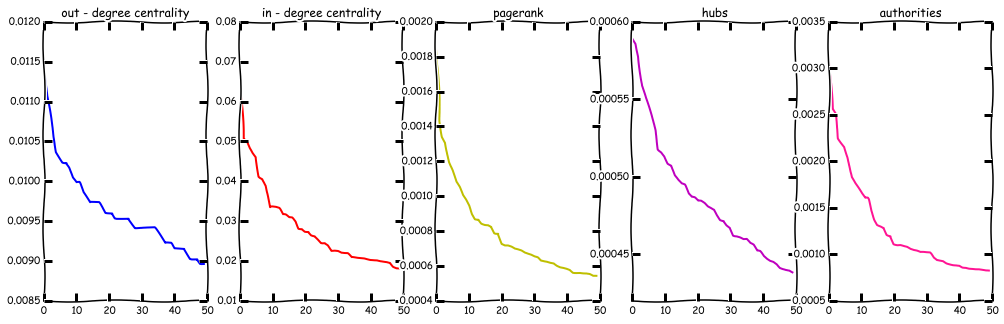

In [103]:
plt.figure(1, figsize=(17,5))

plt.subplot(1,5,1)
plt.plot([value for (key,value) in outdeg50])
plt.title('out - degree centrality')

plt.subplot(1,5,2)
plt.plot([value for (key,value) in indeg50], 'r')
plt.title('in - degree centrality')


plt.subplot(1,5,3)
plt.plot([value for (key,value) in pagerank50], 'y')
plt.title('pagerank')

plt.subplot(1,5,4)
plt.plot([value for (key,value) in h50],'m')
plt.title('hubs')

plt.subplot(1,5,5)
plt.plot([value for (key,value) in a50],color = '#FF1493')
plt.title('authorities')

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://www.hse.ru/data/2016/03/05/1125656999/universities.zip) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [4]:
#and now a lot of boring code
dataB = scipy.io.loadmat('Berkeley13.mat')
dataC = scipy.io.loadmat('Caltech36.mat')
dataH = scipy.io.loadmat('Harvard1.mat')
dataO = scipy.io.loadmat('Oklahoma97.mat')
dataP = scipy.io.loadmat('Princeton12.mat')
dataT = scipy.io.loadmat('Texas80.mat')

In [5]:
GB = nx.from_scipy_sparse_matrix(dataB['A'], create_using=nx.DiGraph())

In [5]:
GC = nx.from_scipy_sparse_matrix(dataC['A'], create_using=nx.DiGraph())

In [6]:
GH = nx.from_scipy_sparse_matrix(dataH['A'], create_using=nx.DiGraph())

In [8]:
GO = nx.from_scipy_sparse_matrix(dataO['A'], create_using=nx.DiGraph())

In [7]:
GP = nx.from_scipy_sparse_matrix(dataP['A'], create_using=nx.DiGraph())

In [10]:
GT = nx.from_scipy_sparse_matrix(dataT['A'], create_using=nx.DiGraph())

In [32]:
loc_infB = dataB['local_info']

#make node attributes
status_flag = {}
gender = {}
major = {}
minor = {}
living = {}
year = {}
high_school = {}


for k in range(0,len(loc_infB)):
    status_flag.update({k:loc_infB[k][0]})
    gender.update({k:loc_infB[k][1]})
    major.update({k:loc_infB[k][2]})
    minor.update({k:loc_infB[k][3]})
    living.update({k:loc_infB[k][4]})
    year.update({k:loc_infB[k][5]})
    high_school.update({k:loc_infB[k][6]})


In [52]:
nx.set_node_attributes(GB,'status_flag',status_flag)
nx.set_node_attributes(GB,'gender',gender)
nx.set_node_attributes(GB,'major',major)
nx.set_node_attributes(GB,'minor',minor)
nx.set_node_attributes(GB,'living',living)
nx.set_node_attributes(GB,'year',year)
nx.set_node_attributes(GB,'high_school',high_school)

In [53]:
ass_degB = nx.degree_assortativity_coefficient(GB)
ass_statusB = nx.attribute_assortativity_coefficient(GB, 'status_flag')
ass_genderB = nx.attribute_assortativity_coefficient(GB, 'gender')
ass_majorB = nx.attribute_assortativity_coefficient(GB, 'major')
ass_minorB = nx.attribute_assortativity_coefficient(GB, 'minor')
ass_livingB = nx.attribute_assortativity_coefficient(GB, 'living')
ass_yearB = nx.attribute_assortativity_coefficient(GB, 'year')
ass_high_schoolB = nx.attribute_assortativity_coefficient(GB, 'high_school')


In [55]:
uni = ['degree assortativity', 'status flag', 'gender', 'major', 'minor', 'living', 'year','high school']
Berkley = [ass_degB,ass_statusB,ass_genderB,ass_majorB,ass_minorB,ass_livingB,ass_yearB,ass_high_schoolB ]
#print(Berkley)

[0.010313459088874384, 0.27458585010098285, 0.040922837639318366, 0.05825502994601474, 0.016560875949192592, 0.1472764407599787, 0.3081210158062389, 0.07737536535425941]


In [8]:
loc_infC = dataC['local_info']

#make node attributes
status_flag = {}
gender = {}
major = {}
minor = {}
living = {}
year = {}
high_school = {}


for k in range(0,len(loc_infC)):
    status_flag.update({k:loc_infC[k][0]})
    gender.update({k:loc_infC[k][1]})
    major.update({k:loc_infC[k][2]})
    minor.update({k:loc_infC[k][3]})
    living.update({k:loc_infC[k][4]})
    year.update({k:loc_infC[k][5]})
    high_school.update({k:loc_infC[k][6]})
    
nx.set_node_attributes(GC,'status_flag',status_flag)
nx.set_node_attributes(GC,'gender',gender)
nx.set_node_attributes(GC,'major',major)
nx.set_node_attributes(GC,'minor',minor)
nx.set_node_attributes(GC,'living',living)
nx.set_node_attributes(GC,'year',year)
nx.set_node_attributes(GC,'high_school',high_school)

In [9]:
ass_degC = nx.degree_assortativity_coefficient(GC)
ass_statusC = nx.attribute_assortativity_coefficient(GC, 'status_flag')
ass_genderC = nx.attribute_assortativity_coefficient(GC, 'gender')
ass_majorC = nx.attribute_assortativity_coefficient(GC, 'major')
ass_minorC = nx.attribute_assortativity_coefficient(GC, 'minor')
ass_livingC = nx.attribute_assortativity_coefficient(GC, 'living')
ass_yearC = nx.attribute_assortativity_coefficient(GC, 'year')
ass_high_schoolC = nx.attribute_assortativity_coefficient(GC, 'high_school')

Caltech = [ass_degC,ass_statusC,ass_genderC,ass_majorC,ass_minorC,ass_livingC,ass_yearC,ass_high_schoolC]
#print(Caltech)

In [10]:
loc_infH = dataH['local_info']

#make node attributes
status_flag = {}
gender = {}
major = {}
minor = {}
living = {}
year = {}
high_school = {}


for k in range(0,len(loc_infH)):
    status_flag.update({k:loc_infH[k][0]})
    gender.update({k:loc_infH[k][1]})
    major.update({k:loc_infH[k][2]})
    minor.update({k:loc_infH[k][3]})
    living.update({k:loc_infH[k][4]})
    year.update({k:loc_infH[k][5]})
    high_school.update({k:loc_infH[k][6]})
    
nx.set_node_attributes(GH,'status_flag',status_flag)
nx.set_node_attributes(GH,'gender',gender)
nx.set_node_attributes(GH,'major',major)
nx.set_node_attributes(GH,'minor',minor)
nx.set_node_attributes(GH,'living',living)
nx.set_node_attributes(GH,'year',year)
nx.set_node_attributes(GH,'high_school',high_school)

ass_degH = nx.degree_assortativity_coefficient(GH)
ass_statusH = nx.attribute_assortativity_coefficient(GH, 'status_flag')
ass_genderH = nx.attribute_assortativity_coefficient(GH, 'gender')
ass_majorH = nx.attribute_assortativity_coefficient(GH, 'major')
ass_minorH = nx.attribute_assortativity_coefficient(GH, 'minor')
ass_livingH = nx.attribute_assortativity_coefficient(GH, 'living')
ass_yearH = nx.attribute_assortativity_coefficient(GH, 'year')
ass_high_schoolH = nx.attribute_assortativity_coefficient(GH, 'high_school')

Harvard = [ass_degH, ass_statusH, ass_genderH, ass_majorH, ass_minorH, ass_livingH, ass_yearH, ass_high_schoolH]
print(Harvard)

[0.14505488767109062, 0.5426250622894172, 0.04526997737944205, 0.04967692832862898, 0.025226846211301897, 0.12567663504955817, 0.4211596421160826, 0.0239867253740597]


In [63]:
loc_infO = dataO['local_info']

#make node attributes
status_flag = {}
gender = {}
major = {}
minor = {}
living = {}
year = {}
high_school = {}


for k in range(0,len(loc_infO)):
    status_flag.update({k:loc_infO[k][0]})
    gender.update({k:loc_infO[k][1]})
    major.update({k:loc_infO[k][2]})
    minor.update({k:loc_infO[k][3]})
    living.update({k:loc_infO[k][4]})
    year.update({k:loc_infO[k][5]})
    high_school.update({k:loc_infO[k][6]})
    
nx.set_node_attributes(GO,'status_flag',status_flag)
nx.set_node_attributes(GO,'gender',gender)
nx.set_node_attributes(GO,'major',major)
nx.set_node_attributes(GO,'minor',minor)
nx.set_node_attributes(GO,'living',living)
nx.set_node_attributes(GO,'year',year)
nx.set_node_attributes(GO,'high_school',high_school)

ass_degO = nx.degree_assortativity_coefficient(GO)
ass_statusO = nx.attribute_assortativity_coefficient(GO, 'status_flag')
ass_genderO = nx.attribute_assortativity_coefficient(GO, 'gender')
ass_majorO = nx.attribute_assortativity_coefficient(GO, 'major')
ass_minorO = nx.attribute_assortativity_coefficient(GO, 'minor')
ass_livingO = nx.attribute_assortativity_coefficient(GO, 'living')
ass_yearO = nx.attribute_assortativity_coefficient(GO, 'year')
ass_high_schoolO = nx.attribute_assortativity_coefficient(GO, 'high_school')

Oklahoma = [ass_degO, ass_statusO, ass_genderO, ass_majorO, ass_minorO, ass_livingO, ass_yearO, ass_high_schoolO]
print(Oklahoma)

[0.073673257939208994, 0.19464267047628556, 0.09283729598272797, 0.03637908876173665, 0.012034234644928967, 0.28033524372883173, 0.20116469146973587, 0.13946840692419749]


In [11]:
loc_infP = dataP['local_info']

#make node attributes
status_flag = {}
gender = {}
major = {}
minor = {}
living = {}
year = {}
high_school = {}


for k in range(0,len(loc_infP)):
    status_flag.update({k:loc_infP[k][0]})
    gender.update({k:loc_infP[k][1]})
    major.update({k:loc_infP[k][2]})
    minor.update({k:loc_infP[k][3]})
    living.update({k:loc_infP[k][4]})
    year.update({k:loc_infP[k][5]})
    high_school.update({k:loc_infP[k][6]})
    
nx.set_node_attributes(GP,'status_flag',status_flag)
nx.set_node_attributes(GP,'gender',gender)
nx.set_node_attributes(GP,'major',major)
nx.set_node_attributes(GP,'minor',minor)
nx.set_node_attributes(GP,'living',living)
nx.set_node_attributes(GP,'year',year)
nx.set_node_attributes(GP,'high_school',high_school)

ass_degP = nx.degree_assortativity_coefficient(GP)
ass_statusP = nx.attribute_assortativity_coefficient(GP, 'status_flag')
ass_genderP = nx.attribute_assortativity_coefficient(GP, 'gender')
ass_majorP = nx.attribute_assortativity_coefficient(GP, 'major')
ass_minorP = nx.attribute_assortativity_coefficient(GP, 'minor')
ass_livingP = nx.attribute_assortativity_coefficient(GP, 'living')
ass_yearP = nx.attribute_assortativity_coefficient(GP, 'year')
ass_high_schoolP = nx.attribute_assortativity_coefficient(GP, 'high_school')

Princeton = [ass_degP, ass_statusP, ass_genderP, ass_majorP, ass_minorP, ass_livingP, ass_yearP, ass_high_schoolP]
print(Princeton)

[0.091092123567965089, 0.4822395993165163, 0.05061073999529174, 0.05439011887139384, 0.015189252032913315, 0.09467841955418972, 0.44674462058408704, 0.01878365524496972]


In [66]:
loc_infT = dataT['local_info']

#make node attributes
status_flag = {}
gender = {}
major = {}
minor = {}
living = {}
year = {}
high_school = {}


for k in range(0,len(loc_infT)):
    status_flag.update({k:loc_infT[k][0]})
    gender.update({k:loc_infT[k][1]})
    major.update({k:loc_infT[k][2]})
    minor.update({k:loc_infT[k][3]})
    living.update({k:loc_infT[k][4]})
    year.update({k:loc_infT[k][5]})
    high_school.update({k:loc_infT[k][6]})
    
nx.set_node_attributes(GT,'status_flag',status_flag)
nx.set_node_attributes(GT,'gender',gender)
nx.set_node_attributes(GT,'major',major)
nx.set_node_attributes(GT,'minor',minor)
nx.set_node_attributes(GT,'living',living)
nx.set_node_attributes(GT,'year',year)
nx.set_node_attributes(GT,'high_school',high_school)

ass_degT = nx.degree_assortativity_coefficient(GT)
ass_statusT = nx.attribute_assortativity_coefficient(GT, 'status_flag')
ass_genderT = nx.attribute_assortativity_coefficient(GT, 'gender')
ass_majorT = nx.attribute_assortativity_coefficient(GT, 'major')
ass_minorT = nx.attribute_assortativity_coefficient(GT, 'minor')
ass_livingT = nx.attribute_assortativity_coefficient(GT, 'living')
ass_yearT = nx.attribute_assortativity_coefficient(GT, 'year')
ass_high_schoolT = nx.attribute_assortativity_coefficient(GT, 'high_school')

Texas = [ass_degT, ass_statusT, ass_genderT, ass_majorT, ass_minorT, ass_livingT, ass_yearT, ass_high_schoolT]
print(Texas)

[0.16389241281404168, 0.2885624277396001, 0.07969306814123502, 0.05971272783340577, 0.018846663311333313, 0.20483760433918657, 0.2461946841617454, 0.14799284823051478]


In [92]:
tab = Table([uni,Berkley,Caltech, Harvard, Oklahoma, Princeton, Texas], names=('University', 'Berkeley','Caltech','Harvard', 'Oklahoma', 'Princeton', 'Texas'))
nn = ['Berkeley','Caltech','Harvard', 'Oklahoma', 'Princeton', 'Texas']
for n in nn:
    tab[n].format = '%.7f'
tab


University,Berkeley,Caltech,Harvard,Oklahoma,Princeton,Texas
str640,float64,float64,float64,float64,float64,float64
degree assortativity,0.0103135,-0.0652730,0.1450549,0.0736733,0.0910921,0.1638924
status flag,0.2745859,0.2440794,0.5426251,0.1946427,0.4822396,0.2885624
gender,0.0409228,0.0463314,0.0452700,0.0928373,0.0506107,0.0796931
major,0.0582550,0.0347194,0.0496769,0.0363791,0.0543901,0.0597127
minor,0.0165609,0.0106746,0.0252268,0.0120342,0.0151893,0.0188467
living,0.1472764,0.3491531,0.1256766,0.2803352,0.0946784,0.2048376
year,0.3081210,0.2375319,0.4211596,0.2011647,0.4467446,0.2461947
high school,0.0773754,0.0026698,0.0239867,0.1394684,0.0187837,0.1479928


<par>Assortativity refers to the tendency according to which network's nodes mainly attach to others that are similar in some way, such as degree value or different nodes' attributes, like gender, year, ethnical and etc. Thus assortativity shows how different features influence on nodes' connection in comparison with random case.
<par> According to the results represented in a table above merely one property, degree value (Caltech university), has the negative impact on nodes' attachment while meaning of other attribute assortativity for all universities are positive although not much more than zero. The most significant influence on nodes' connections has status flag (Harvard) and makes up just under 0.54, oppositely the lowest one on the average has minor attribute.


Add some visualization, which shows that this range of attributes indeed does not impact nodes' attachment in high extent.

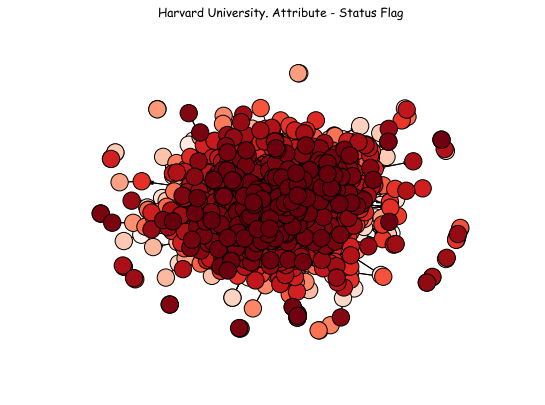

In [12]:
plt.figure(1,figsize = (7,5))
nx.draw_spring(GH,
          
          node_color=list(nx.get_node_attributes(GH,'status_flag')),
          cmap=plt.cm.Reds,
          )
plt.title('Harvard University. Attribute - Status Flag')

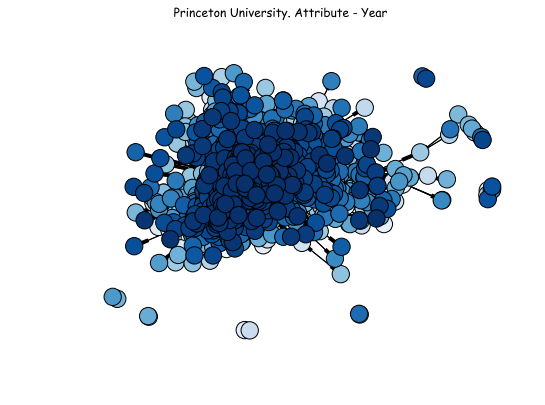

In [13]:
plt.figure(1,figsize = (7,5))
nx.draw_spring(GP,
          
          node_color=list(nx.get_node_attributes(GP,'year')),
          cmap=plt.cm.Blues,
          )
plt.title('Princeton University. Attribute - Year')

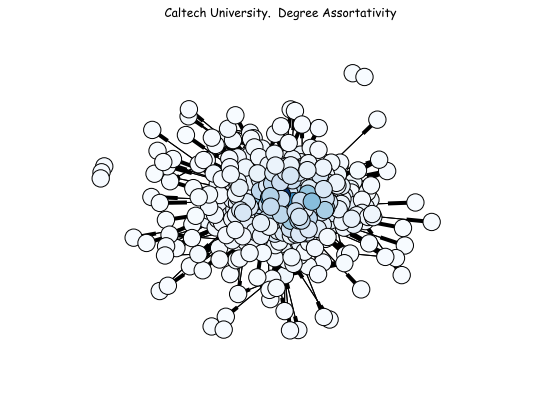

In [14]:
plt.figure(1,figsize = (7,5))
nx.draw_spring(GC,
          
          node_color=list(nx.degree(GC).values()),
          cmap=plt.cm.Blues,
          )
plt.title('Caltech University.  Degree Assortativity')

$\bf The End:)$